#Tensorflow Regression (quality prediction)


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

start_time = time.time()

# Load the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv', sep=';')
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Ejemplo 1 (se debe normalizar):
Supongamos que tenemos un conjunto de datos que representa la altura de personas en centímetros y su respectivo peso en kilogramos. Los valores mínimos y máximos son los siguientes:

Altura: min=150cm, max=190cm
Peso: min=50kg, max=120kg
Podemos observar que la diferencia entre el mínimo y el máximo de altura es mucho mayor que la diferencia entre el mínimo y el máximo de peso. Por lo tanto, si queremos aplicar un algoritmo de aprendizaje automático que tenga en cuenta ambas características de manera igual, es necesario normalizar los datos para que ambas características estén en la misma escala.

Ejemplo 2 (no se debe normalizar):
Supongamos que tenemos un conjunto de datos que representa la temperatura ambiente en grados Celsius y la temperatura del agua en grados Celsius en diferentes momentos del día. Los valores mínimos y máximos son los siguientes:

Temperatura ambiente: min=15°C, max=35°C
Temperatura del agua: min=18°C, max=22°C
En este caso, las diferencias entre los mínimos y máximos son similares en ambas características, por lo que no es necesario normalizar los datos. Además, en este caso, normalizar los datos podría incluso eliminar información importante, ya que la diferencia entre la temperatura ambiente y la del agua es una característica importante que debe mantenerse en la escala original.

In [2]:
import json
import tensorflow as tf
import pandas as pd

# Load the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv', sep=';')

# Calcular valores máximos y mínimos
max_values = dataset.max()
min_values = dataset.min()

# Guardar los valores máximos y mínimos en un archivo JSON
print("max_values: ", max_values)
print(min_values)




max_values:  fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64
fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
dtype: float64


Se debe normalizar por la diferentes escalas que hay en el data set

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

start_time = time.time()

# Load the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv', sep=';')

# Display the dataset description
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

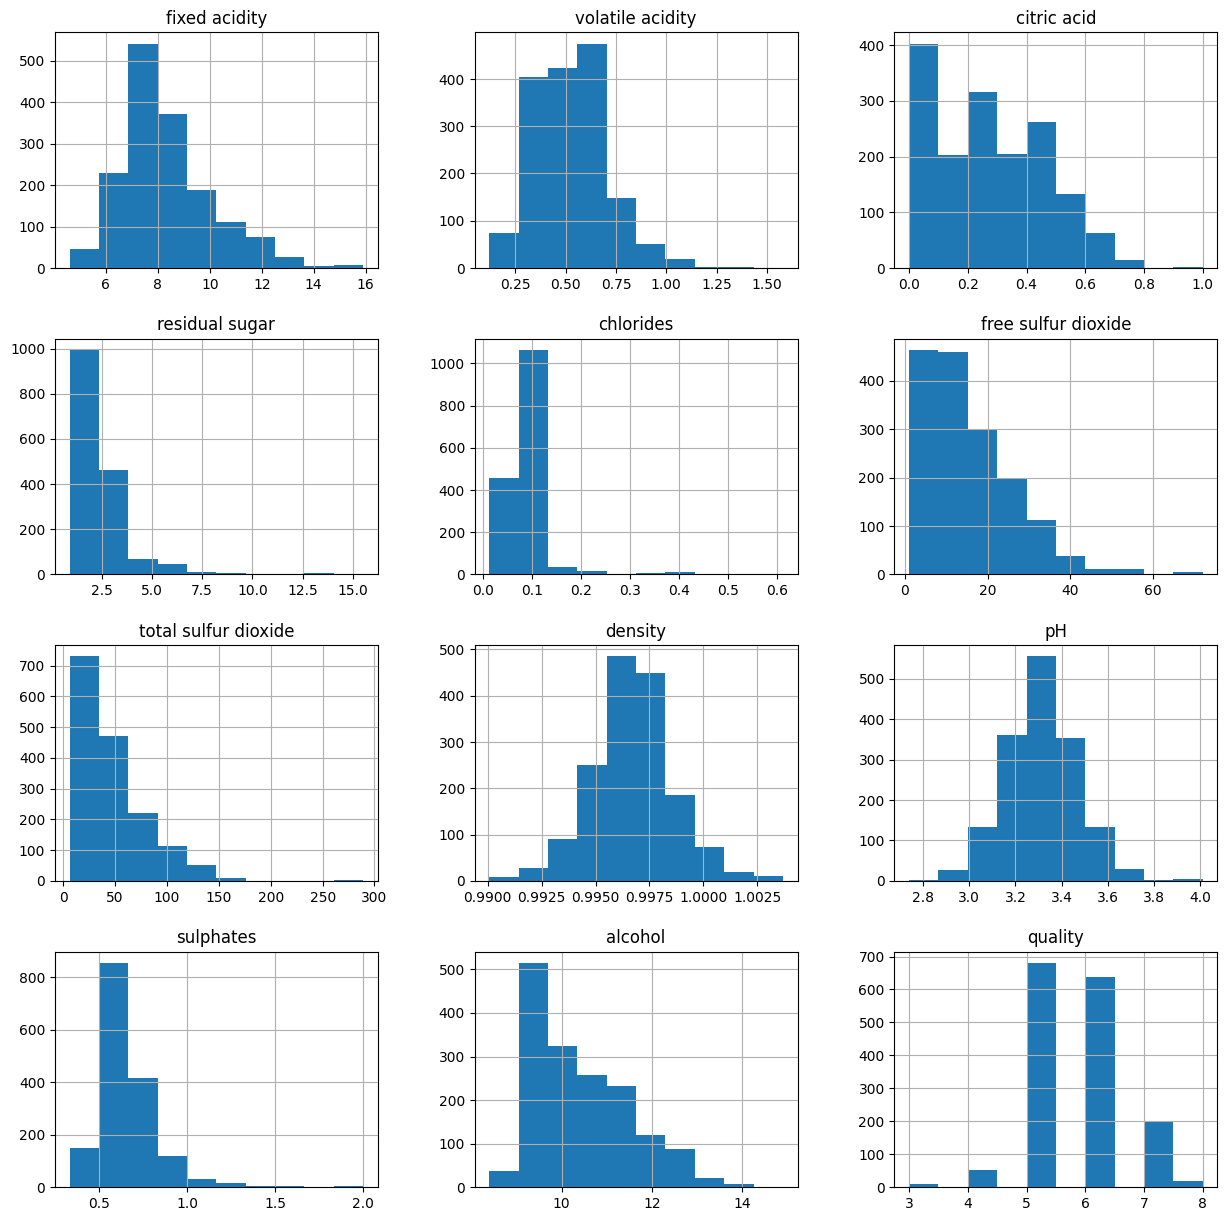

In [4]:
# Plot histograms of the dataset
dataset.hist(figsize=(15, 15))

In [5]:
# Function to normalize the dataset
def normalizar(x, xmax, xmin, ymax, ymin):
    m = (ymax - ymin) / (xmax - xmin)
    b = ymin - m * xmin
    y = m * x + b
    return y

# Calculate the maximum and minimum values of the dataset
max_values = dataset.max()
min_values = dataset.min()

# Normalize the dataset
data = normalizar(dataset, max_values, min_values, 1, 0)

# Display the first 5 rows of the normalized data
print(data.head(4))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   

    alcohol  quality  
0  0.153846      0.4  
1  0.215385      0.4  
2  0.215385      0.4  
3  0.215385      0.6  


In [6]:

# Split the data into features and labels
X = data.drop('quality', axis=1)
y = data['quality']

# Display the first 4 rows of features and labels
print(X.head(4))
print(y.head(4))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   

    alcohol  
0  0.153846  
1  0.215385  
2  0.215385  
3  0.215385  
0    0.4
1    0.4
2    0.4
3    0.6
Name: quality, dtype: float64


In [7]:
# Set the seed for reproducibility
tf.random.set_seed(42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

input_shape = (X_train.shape[1])
print(input_shape)

11


In [8]:
# Define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def model_Nadam():
    model = Sequential()
    model.add(Dense(16, input_dim=input_shape, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.summary()

    opt = tf.keras.optimizers.Nadam(
        learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
    )
    model.compile(loss='mse', optimizer=opt)
    return model

# Create and train the model
model = model_Nadam()
history = model.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_test, y_test), verbose=0)

# Print the final loss
final_loss = history.history['loss'][-1]
print("Final loss: ", final_loss)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

Final loss:  0.016807937994599342


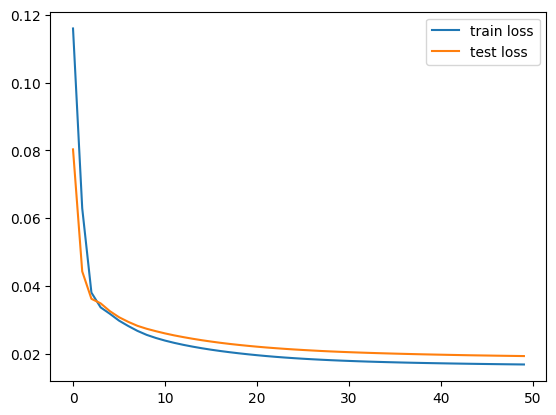

In [9]:
# Plot the loss graphs
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

In [10]:
# Define the new input for prediction
new_data = pd.DataFrame({
    'fixed acidity': [7.4],
    'volatile acidity': [0.7],
    'citric acid': [0.0],
    'residual sugar': [1.9],
    'chlorides': [0.076],
    'free sulfur dioxide': [11.0],
    'total sulfur dioxide': [34.0],
    'density': [0.9978],
    'pH': [3.51],
    'sulphates': [0.56],
    'alcohol': [9.4]
})

# Normalize the new input data using the same normalization process
new_data_normalized = normalizar(new_data, max_values.drop('quality'), min_values.drop('quality'), 1, 0)

# Predict the quality using the trained model with normalized input data
predicted_quality_normalized = model.predict(new_data_normalized)
print("Predicted quality (normalized): ", predicted_quality_normalized[0][0])

# De-normalize the predicted quality to the original scale
predicted_quality = normalizar(predicted_quality_normalized, 1, 0, max_values['quality'], min_values['quality'])
print("Predicted quality (original scale): ", predicted_quality[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Predicted quality (normalized):  0.41372705
Predicted quality (original scale):  5.068635
